In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model 
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

Using TensorFlow backend.
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df=pd.read_csv('used_car_tayara1.csv',index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
make_model=pd.read_csv('make_model.csv')

In [3]:
df

,name,price,mile_age,make,model,year,fuel,power,car_body_style,vehicle_condition,color,transmission,engine_size,description,linkofproduct
0,Ford Kuga Trend 1.5 BVM,0 DT,77000.0,Ford,Kuga,2018.0,Essence,8.0,Autres,Avec kilométrage,Vert,Manuelle,1.5,Pas d'échange et courtier s'abstenir.,https://www.tayara.tn/listings/voitures-9/6845...
1,Peugeot 208,0 DT,128000.0,Peugeot,208,2017.0,Essence,5.0,Autres,Avec kilométrage,Orange,Manuelle,1.2,A vender une très belle Peugeot 208 en très bo...,https://www.tayara.tn/listings/voitures-9/a472...
2,CITROËN C4🚘 ✅1ère main ✅,0 DT,124000.0,Citroen,C4,2014.0,Essence,6.0,1.4,NaN,Manuelle,NaN,NaN,CITROËN C4🚘,https://www.tayara.tn/listings/voitures-9/2f7f...
3,🏁 Citroën DS4 🏁,39 500 DT,150000.0,Citroen,DS4,2013.0,Diesel,6.0,1.6,NaN,Manuelle,NaN,NaN,🏁 Citroën DS4 🏁,https://www.tayara.tn/listings/voitures-9/113b...
4,SEAT LEON 2018,0 DT,71000.0,Seat,Leon,2018.0,Essence,6.0,Compacte,Avec kilométrage,Autre,Manuelle,1.2,à vendre Seat Léon style plus en très bon état...,https://www.tayara.tn/listings/voitures-9/0602...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,b9 phase 2 première main,24 DT,202.0,Peugeot,Partner,2013.0,Diesel,5.0,Compacte,Avec kilométrage,Noir,Manuelle,1.6,a vendre ou échange b9 phase 2 première main t...,https://www.tayara.tn/listings/voitures-9/6833...
1304,clio classique,15 500 000 DT,233000.0,Renault,Clio,2008.0,Essence,5.0,Compacte,Nouveau,Noir,Manuelle,1.2,clio classique 5ch essence modèle 2008 numéro ...,https://www.tayara.tn/listings/voitures-9/9913...
1305,TOYOTA PRADO première main importée de Dubai,0 DT,210.0,Toyota,Prado,2010.0,Diesel,11.0,4 x 4,Avec kilométrage,Noir,Manuelle,3.0,A vendre chez,https://www.tayara.tn/listings/voitures-9/ba37...
1306,Peugeot 308 prix 32 000,32 000 DT,160.0,Peugeot,308,2014.0,Essence,5.0,Compacte,Avec kilométrage,Noir,Manuelle,1.2,A VENDRE peugeot 308 modèle fin 2014 Série 172...,https://www.tayara.tn/listings/voitures-9/2acb...


In [4]:
df.shape

(1308, 15)

In [5]:
df=df.dropna(how='all')
df.shape

(1308, 15)

In [6]:
df.isnull().sum()

name                  20
price                 20
mile_age              20
make                  18
model                 18
year                  20
fuel                  18
power                 18
car_body_style        18
vehicle_condition    163
color                 18
transmission         213
engine_size          294
description           79
linkofproduct          0
dtype: int64

In [7]:
df=df.fillna("")
df=df.replace({'engine_size': {'>4.0': '4.5', '<1.0':'0.8'}}, regex=True)

df['price']=df['price'].replace(' DT', '', regex=True)
df['price']=df['price'].replace('\u202f', '', regex=True)
df['price']=df['price'].replace('', 0, regex=True).astype(float)
df['mile_age']=df['mile_age'].replace(np.nan, 0, regex=True)
df['mile_age']=df['mile_age'].replace('', 0, regex=True).astype('int64')
df['power']=df['power'].replace('', 0, regex=True).astype('int64')
df['year']=df['year'].replace('', 0, regex=True).astype('int64')

In [8]:
df1=df
df1=df[df['price'] != 0].reset_index(drop=True)
df1.shape

(797, 15)

In [9]:
car_style=['Compacte','Berline','Cabriolet','4 x 4','Monospace','Utilitaire','Pick up','Autres']
car_condition=['Nouveau','Avec kilométrage','Non dédouanné','RS','Pièces manquantes']
transmission=['Automatique','Manuelle']
engine_size=[0.8,1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
             2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,4.5]

color=["Argen","Beige","Blanc","Bleu","Camel","Corail","Doré","Gris","Jaune","Marron",
       "Multicolore","Noir","Orange","Rose","Rouge","Vert","Violet","Autre"]

In [10]:
from statistics  import median
def get_median(serie):
    return median(list(map(float,list(filter(None,serie))))) 

In [11]:
df1.head()

,name,price,mile_age,make,model,year,fuel,power,car_body_style,vehicle_condition,color,transmission,engine_size,description,linkofproduct
0,🏁 Citroën DS4 🏁,39500.0,150000,Citroen,DS4,2013,Diesel,6,1.6,,Manuelle,,,🏁 Citroën DS4 🏁,https://www.tayara.tn/listings/voitures-9/113b...
1,Mazda bt 50 4×4,32000.0,250,Mazda,BT-50,2013,Diesel,9,4 x 4,Avec kilométrage,Noir,Manuelle,1.9,Mazda bt 50 4×4 1er main,https://www.tayara.tn/listings/voitures-9/6f5a...
2,Citroën berlingo,23400.0,132,Citroen,Berlingo,2012,Diesel,7,Utilitaire,Nouveau,Blanc,Manuelle,1.9,Première main avec peinture d'origine tt options.,https://www.tayara.tn/listings/voitures-9/23da...
3,Seat leon TSI,40000.0,145,Seat,Leon,2013,Essence,5,Berline,Avec kilométrage,Noir,Manuelle,1.2,Tel 90570889,https://www.tayara.tn/listings/voitures-9/385b...
4,Megane 2 phase 2 1.5 dci,16000.0,220000,Renault,Megane,2005,Diesel,5,Berline,Avec kilométrage,Blanc,Manuelle,1.5,,https://www.tayara.tn/listings/voitures-9/7459...


In [12]:
    
#df1=df1.fillna("")
power_med=get_median(df1['power'])
year_med=get_median(df1['year'])
eng_size_med=get_median(df1['engine_size'])
for i in range(len(df1)):
    
    aux=[]
    test=True
    while(test):
        for j in df1.columns[8:13]:  
            try:
                if  df1[j][i]=="<1.0":
                    df1[j][i]=0.8
                if df1[j][i]==">4.0":
                    df1[j][i]=4.5  
                df1[j][i]=float(df1[j][i])
            except:
                pass
                
            if  df1[j][i] in car_style:
                if j!='car_body_style':
                    if (df1['car_body_style'][i]!='') : aux.append(df1['car_body_style'][i])  
                    df1['car_body_style'][i]=df1[j][i]
                    df1[j][i]=''
                    print('permute saret in',j,' ',i)
            if df1[j][i] in car_condition:
                if j!='vehicle_condition':
                    if df1['vehicle_condition'][i]!='' : aux.append(df1['vehicle_condition'][i])  
                    df1['vehicle_condition'][i]=df1[j][i]
                    df1[j][i]=''
                    print('permute saret in',j,' ',i)
            if df1[j][i] in engine_size:
                if j!='engine_size':
                    if df1['engine_size'][i]!='' : aux.append(df1['engine_size'][i]) 
                    df1['engine_size'][i]=df1[j][i]
                    df1[j][i]=''
                    print('permute saret in',j,' ',i)
            if df1[j][i] in color:
                if j!="color":
                    if df1['color'][i]!='' : aux.append(df1['color'][i]) 
                    df1['color'][i]=df1[j][i]
                    df1[j][i]=''
                    print('permute saret in',j,' ',i)
            if df1[j][i] in transmission:
                if j!="transmission":
                    if df1['transmission'][i]!='': aux.append(df1['transmission'][i]) 
                    df1['transmission'][i]=df1[j][i]
                    df1[j][i]=''
                    print('permute saret in',j,' ',i)
        if len(aux) != 0:
            print('aux fiha: ',aux)
            for k in range(len(aux)):
                if aux[k] in car_style: df1['car_body_style'][i]=aux[k]
                if aux[k] in car_condition: df1['vehicle_condition'][i]=aux[k]
                if aux[k] in engine_size: df1['engine_size'][i]=aux[k]
                if aux[k] in color: df1['color'][i]=aux[k]
                if aux[k] in transmission: df1['transmission'][i]=aux[k]
            test=False
        if len(aux)==0:
            print('ligne ',i,' is correcte!')
            test=False
        else:
            print("chek ligne",i)
            test=False
            
    if (df1['price'][i]<100) & (df1['price'][i]>2.5):
        df1['price'][i]=df1['price'][i]*1000
        
    if ((df1['price'][i]>1000000) & (df1['price'][i]%1000 == 0)):
        df1['price'][i]=df1['price'][i]/1000
        
    if (df1['price'][i]>1000000): df1['price'][i]=0

    if (df1['mile_age'][i]<1000): df1['mile_age'][i]=df1['mile_age'][i]*1000
        
    if (df1['power'][i]>60): df1['power'][i]=power_med
    
    if (df1['year'][i]<1960) or (df1['year'][i]>2021):
        df1['year'][i]=year_med

df1['car_body_style']=df1['car_body_style'].replace('', 'missing style', regex=True)
df1['vehicle_condition']=df1['vehicle_condition'].replace('', 'missing condition', regex=True)
df1['engine_size']=df1['engine_size'].replace('', eng_size_med, regex=True)
df1['transmission']=df1['transmission'].replace('', 'missing transmission', regex=True)


C:\Users\meher\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\meher\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\meher\anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\meher\anaconda3\lib\site-packages\ipykernel_launcher.py:47: Set

permute saret in car_body_style   0
permute saret in color   0
ligne  0  is correcte!
ligne  1  is correcte!
ligne  2  is correcte!
ligne  3  is correcte!
ligne  4  is correcte!
ligne  5  is correcte!
ligne  6  is correcte!
ligne  7  is correcte!
permute saret in car_body_style   8
permute saret in color   8
ligne  8  is correcte!
ligne  9  is correcte!
ligne  10  is correcte!
ligne  11  is correcte!
ligne  12  is correcte!
ligne  13  is correcte!
ligne  14  is correcte!
ligne  15  is correcte!
permute saret in car_body_style   16
permute saret in color   16
ligne  16  is correcte!
ligne  17  is correcte!
ligne  18  is correcte!
ligne  19  is correcte!
ligne  20  is correcte!
permute saret in car_body_style   21
permute saret in color   21
ligne  21  is correcte!
permute saret in car_body_style   22
permute saret in transmission   22
aux fiha:  ['Manuelle']
chek ligne 22
ligne  23  is correcte!
ligne  24  is correcte!
ligne  25  is correcte!
ligne  26  is correcte!
ligne  27  is correc

C:\Users\meher\anaconda3\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 296  is correcte!
permute saret in car_body_style   297
permute saret in vehicle_condition   297
ligne  297  is correcte!
ligne  298  is correcte!
ligne  299  is correcte!
ligne  300  is correcte!
ligne  301  is correcte!
ligne  302  is correcte!
ligne  303  is correcte!
ligne  304  is correcte!
permute saret in vehicle_condition   305
aux fiha:  ['1.2']
chek ligne 305
permute saret in car_body_style   306
permute saret in color   306
ligne  306  is correcte!
ligne  307  is correcte!
ligne  308  is correcte!
ligne  309  is correcte!
ligne  310  is correcte!
ligne  311  is correcte!
permute saret in car_body_style   312
permute saret in color   312
ligne  312  is correcte!
ligne  313  is correcte!
permute saret in car_body_style   314
permute saret in color   314
ligne  314  is correcte!
permute saret in car_body_style   315
permute saret in color   315
ligne  315  is correcte!
ligne  316  is correcte!
ligne  317  is correcte!
ligne  318  is correcte!
permute saret in car_body_style   

In [13]:
df1.columns

Index(['name', 'price', 'mile_age', 'make', 'model', 'year', 'fuel', 'power',
       'car_body_style', 'vehicle_condition', 'color', 'transmission',
       'engine_size', 'description', 'linkofproduct'],
      dtype='object')

In [14]:
df1=df1.drop(['description', 'linkofproduct','color','name'], axis=1)

In [15]:
df1=pd.concat([df1, pd.get_dummies(df1.model),pd.get_dummies(df1.make), pd.get_dummies(df1.fuel), pd.get_dummies(df1.car_body_style), pd.get_dummies(df1.vehicle_condition), pd.get_dummies(df1.transmission)], axis=1)

In [16]:
df1.shape

(797, 263)

In [17]:
y=df1['price']
X=df1.drop(columns=['price','make','model','fuel','car_body_style', 'vehicle_condition', 'transmission'])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 )#, random_state=123)

In [19]:
df1.dtypes

price                float64
mile_age               int64
make                  object
model                 object
year                   int64
                      ...   
Pièces manquantes      uint8
RS                     uint8
missing condition      uint8
Automatique            uint8
Manuelle               uint8
Length: 263, dtype: object

In [20]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1], ), activation='relu', name='dense_1'))
model.add(Dense(32, activation='relu', name='dense_2'))
model.add(Dense(32, activation='relu', name='dense_3'))
model.add(Dense(16, activation='relu', name='dense_4'))
model.add(Dense(1, activation='relu', name='dense_output'))
#model.compile(optimizer='adam', loss='mse', metrics=['mae','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_output (Dense)         (None, 1)                 17        
Total params: 20,129
Trainable params: 20,129
Non-trainable params: 0
_________________________________________________________________


In [21]:
opt = keras.optimizers.Adam(lr=0.5)
#model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer="Adam", metrics=['mean_absolute_error'])

In [22]:
"""import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()"""

'import tensorflow.compat.v1 as tf\ntf.disable_v2_behavior()'

In [23]:
"""if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()"""

"if 'session' in locals() and session is not None:\n    print('Close interactive session')\n    session.close()"

In [24]:
import tensorflow as tf
config = tf.ConfigProto(
device_count={'GPU': 1},
intra_op_parallelism_threads=1,
allow_soft_placement=True
)

config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.6

session = tf.Session(config=config)
keras.backend.set_session(session)

In [25]:
model_history=model.fit(X_train, y_train ,epochs=100, batch_size=2, validation_split = 0.1)


Train on 645 samples, validate on 72 samples
Epoch 1/100
645/645 [==============================] - 2s 3ms/step - loss: 271707.0173 - mean_absolute_error: 271707.0000 - val_loss: 29012.0497 - val_mean_absolute_error: 29012.0508
Epoch 2/100
645/645 [==============================] - 1s 2ms/step - loss: 160207.0740 - mean_absolute_error: 160207.0000 - val_loss: 27754.8001 - val_mean_absolute_error: 27754.8008
Epoch 3/100
645/645 [==============================] - 1s 1ms/step - loss: 55039.1341 - mean_absolute_error: 55039.1445 - val_loss: 30231.2313 - val_mean_absolute_error: 30231.2324
Epoch 4/100
645/645 [==============================] - 1s 1ms/step - loss: 30580.2939 - mean_absolute_error: 30580.2891 - val_loss: 29990.0498 - val_mean_absolute_error: 29990.0488
Epoch 5/100
645/645 [==============================] - 1s 1ms/step - loss: 160431.9887 - mean_absolute_error: 160431.9688 - val_loss: 30251.9540 - val_mean_absolute_error: 30251.9512
Epoch 6/100
645/645 [======================

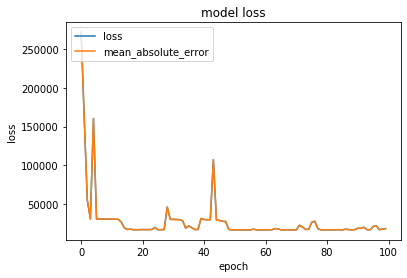

In [26]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['mean_absolute_error'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mean_absolute_error'], loc='upper left')
plt.show()

In [27]:
def getres(pred,dic):
    pred.values[:] = 0
    pred['year']=int(dic["year"])
    pred['mile_age']=int(dic["mileage"])
    pred['power']=int(dic["power"])
    pred['engine_size']=float(dic["engine_size"])
    if dic["make"]in pred.index : pred[dic["make"]]=1
    if dic["model"]in pred.index :pred[dic["model"]]=1
    if dic["fuel"]in pred.index :pred[dic["fuel"]]=1
    if dic["transmission"]in pred.index :pred[dic["transmission"]]=1
    if dic["car_condition"]in pred.index :pred[dic["car_condition"]]=1
    if dic["car_style"]in pred.index :pred[dic["car_style"]]=1
    with session.as_default():
        with session.graph.as_default():
            res=model.predict(np.array(pred).reshape(1,pred.shape[0]))[0][0]
    return res 
getres(X_test.iloc[2],{'make': 'Chevrolet', 'model': 'Malibu', 'mileage': '100000', 'year': '2018', 'fuel': 'Diesel', 'power': '3', 'transmission': 'Automatic', 'engine_size': '1.3', 'car_condition': 'RS', 'car_style': 'Berline'})

32022.143

In [28]:
X_test.iloc[2].index

Index(['mile_age', 'year', 'power', 'engine_size', '104', '106', '12', '126',
       '19', '190',
       ...
       'Utilitaire', 'missing style', 'Avec kilométrage', 'Non dédouanné',
       'Nouveau', 'Pièces manquantes', 'RS', 'missing condition',
       'Automatique', 'Manuelle'],
      dtype='object', length=256)

In [29]:
model.predict(np.array(X_test.iloc[2]).reshape(1,X_test.iloc[2].shape[0]))[0][0]

23511.129

In [ ]:
from flask import Flask, request, make_response
import json
import time

app = Flask(__name__)
@app.route('/', methods=['POST'])
def index():
   
    skelet=X_test.iloc[2]
    
    d = request.form.to_dict() # data recived from form
   
    #pred_array=getpres(skelet,d)
    
    result=getres(skelet,d)
    
    
        
        
    data=make_response(json.dumps({"price":int(result)})) # transform final result to json
    #data=make_response(d) 
    resp=data
    resp.status_code = 200
    resp.headers['Access-Control-Allow-Origin'] = '*' # configiration 

    print(d)
    print(skelet)
    #print(result)
    
    return resp


    
    
    
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Mar/2021 15:56:07] "POST / HTTP/1.1" 200 -


{'make': 'Chevrolet', 'model': 'Malibu1LT', 'mileage': '100000', 'year': '2018', 'fuel': 'Gasoline', 'power': '3', 'transmission': 'Manual', 'engine_size': '1.3', 'car_condition': 'Avec kilométrage', 'car_style': 'Compacte'}
mile_age             100000.0
year                   2018.0
power                     3.0
engine_size               1.3
104                       0.0
                       ...   
Pièces manquantes         0.0
RS                        0.0
missing condition         0.0
Automatique               0.0
Manuelle                  0.0
Name: 491, Length: 256, dtype: float64


127.0.0.1 - - [17/Mar/2021 16:04:27] "POST / HTTP/1.1" 200 -


{'make': 'BMW', 'model': '4', 'mileage': '100000', 'year': '2017', 'fuel': 'Gasoline', 'power': '8', 'transmission': 'Automatic', 'engine_size': '2.5', 'car_condition': 'Non dédouanné', 'car_style': 'Compacte'}
mile_age             100000.0
year                   2017.0
power                     8.0
engine_size               2.5
104                       0.0
                       ...   
Pièces manquantes         0.0
RS                        0.0
missing condition         0.0
Automatique               0.0
Manuelle                  0.0
Name: 491, Length: 256, dtype: float64


127.0.0.1 - - [17/Mar/2021 16:17:44] "POST / HTTP/1.1" 200 -


{'make': 'BMW', 'model': '5', 'mileage': '100000', 'year': '2017', 'fuel': 'Gasoline', 'power': '7', 'transmission': 'Automatic', 'engine_size': '1.3', 'car_condition': 'Avec kilométrage', 'car_style': 'Compacte'}
mile_age             100000.0
year                   2017.0
power                     7.0
engine_size               1.3
104                       0.0
                       ...   
Pièces manquantes         0.0
RS                        0.0
missing condition         0.0
Automatique               0.0
Manuelle                  0.0
Name: 491, Length: 256, dtype: float64


127.0.0.1 - - [17/Mar/2021 16:27:04] "POST / HTTP/1.1" 200 -


{'make': 'BMW', 'model': '5', 'mileage': '100000', 'year': '2017', 'fuel': 'Gasoline', 'power': '7', 'transmission': 'Automatic', 'engine_size': '1.3', 'car_condition': 'Avec kilométrage', 'car_style': 'Compacte'}
mile_age             100000.0
year                   2017.0
power                     7.0
engine_size               1.3
104                       0.0
                       ...   
Pièces manquantes         0.0
RS                        0.0
missing condition         0.0
Automatique               0.0
Manuelle                  0.0
Name: 491, Length: 256, dtype: float64


In [ ]:
skelet